# Gaussian fit & peak characteristics

In [2]:
import numpy, matplotlib.pyplot

spectrum = numpy.loadtxt("../data/co60.dat", dtype=int)
background = numpy.divide(numpy.loadtxt("../data/background.dat", dtype=int),200)
spectrum_foreground = numpy.subtract(spectrum,background)

## Statistical Analysis

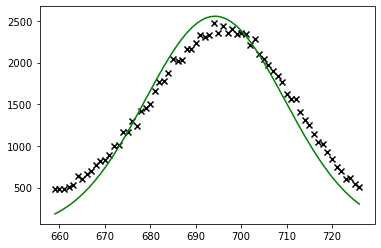

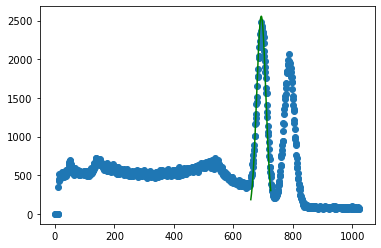

Centroid:	694.2445546755031
FWHM:		36.1250554758831
Amplitude:	2556.59247549924 (calculated)
		2556.5866832751954 (of fit)


In [44]:
from math import sqrt, pi
from numpy import exp

gauss = lambda x, mu, sigma, amp: amp/(sigma*sqrt(2*pi))*numpy.exp(-1/2*((x-mu)/sigma)**2)

peak=range(659,727)
data = numpy.concatenate([[i]*int(spectrum_foreground[i]) for i in peak])
mu = numpy.mean(data)
sigma = numpy.std(data)

x = numpy.linspace(numpy.min(data), numpy.max(data), 1000)
area = numpy.trapz(spectrum_foreground[peak], dx=1)
matplotlib.pyplot.scatter(peak, spectrum_foreground[peak], marker="x", color='k')
matplotlib.pyplot.plot(x, gauss(x, mu, sigma, area), color='g')
matplotlib.pyplot.show()

matplotlib.pyplot.scatter(range(len(spectrum_foreground)),spectrum_foreground)
matplotlib.pyplot.plot(x, gauss(x, mu, sigma, area), color='g')
matplotlib.pyplot.show()

print("Centroid:\t{}\nFWHM:\t\t{}\nAmplitude:\t{} (calculated)\n\t\t{} (of fit)".format(mu,2.35*sigma,area/(sigma*sqrt(2*pi)),max(gauss(x, mu, sigma, area))))

## SciPy's `norm()`

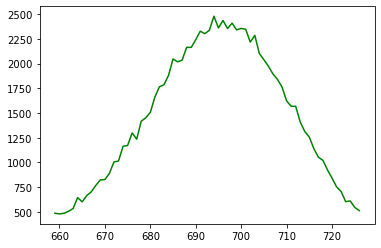

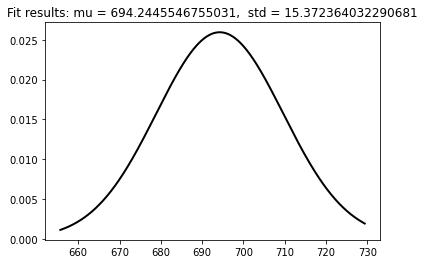

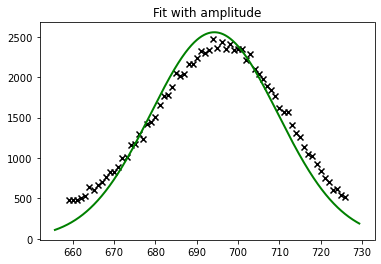

In [45]:
from scipy.stats import norm

peak=range(659,727)
data = numpy.concatenate([[i]*int(spectrum_foreground[i]) for i in peak])
mu = numpy.mean(data)
std = numpy.std(data)

# Plot the histogram.
matplotlib.pyplot.plot(peak, spectrum_foreground[peak], color='g')

# Plot the PDF.
xmin, xmax = matplotlib.pyplot.xlim()
matplotlib.pyplot.show()

x = numpy.linspace(xmin, xmax, 1000)
matplotlib.pyplot.plot(x, norm.pdf(x, mu, std), 'k', linewidth=2)
matplotlib.pyplot.title("Fit results: mu = {},  std = {}".format(mu, std))
matplotlib.pyplot.show()

matplotlib.pyplot.scatter(peak, spectrum_foreground[peak], color='k', marker="x")
matplotlib.pyplot.plot(x, area*norm.pdf(x, mu, std), 'g', linewidth=2)
matplotlib.pyplot.title("Fit with amplitude".format(mu, std))
matplotlib.pyplot.show()

## Subtracting baseline

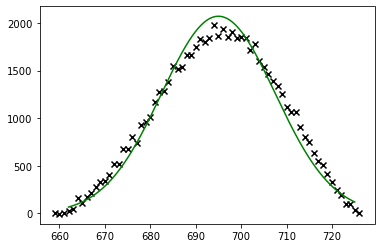

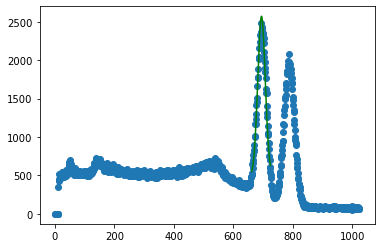

Centroid:	694.9880714483352
FWHM:		29.46270957117048
Amplitude:	2070.800715952331 (calculated)
		2070.800471689655 (of fit)


In [52]:
from math import sqrt, pi
from numpy import exp

peak=range(659,727)
m = (spectrum_foreground[peak][-1]-spectrum_foreground[peak][0])/(peak[-1]-peak[0])
b = spectrum_foreground[peak][-1]-m*peak[-1]

baseline = lambda x: m*x+b
y=[baseline(x) for x in peak]
spectrum_foreground_peak = numpy.subtract(spectrum_foreground[peak],y)

data = numpy.concatenate([[i]*int(spectrum_foreground_peak[i-659]) for i in peak])
mu = numpy.mean(data)
sigma = numpy.std(data)

gauss = lambda x, mu, sigma, amp: amp/(sigma*sqrt(2*pi))*numpy.exp(-1/2*((x-mu)/sigma)**2)



x = numpy.linspace(numpy.min(data), numpy.max(data), 1000)
area = numpy.trapz(spectrum_foreground_peak, dx=1)
matplotlib.pyplot.scatter(peak, spectrum_foreground_peak, marker="x", color='k')
matplotlib.pyplot.plot(x, gauss(x, mu, sigma, area), color='g')
matplotlib.pyplot.show()

matplotlib.pyplot.scatter(range(len(spectrum_foreground)),spectrum_foreground)
matplotlib.pyplot.plot(x, gauss(x, mu, sigma, area)+baseline(x), color='g')
matplotlib.pyplot.show()

print("Centroid:\t{}\nFWHM:\t\t{}\nAmplitude:\t{} (calculated)\n\t\t{} (of fit)".format(mu,2.35*sigma,area/(sigma*sqrt(2*pi)),max(gauss(x, mu, sigma, area))))